### Import necessary modules

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns',None)

# Life Cycle of the project.

* Exploratory Data Analysis

* Feature Engineering

* Feature Transformation

* Model Building

## Steps in Project Lifecycle
* Check Missing Values
* Identify all the Numerical Variables 
* Distribution of the Numerical Variables
* Categorical Variables
* Cardinality of Categorical Variables
* Outliers
* Relationship between independent and dependent feature(SalePrice)

* Exploratory data analysis (EDA)
* Data Pre-processing
* Feature engineering
* Feature Transformation
* Model Training and Testing
* Model Evaluation
* Hyperparameter tuning


## Problem Statement:
Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. 

In a data warehouse, these data stores hold a significant amount of consumer information and particular item details. 
By mining the data store from the data warehouse, more anomalies and common patterns can be discovered.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

Results: You have to build a solution that should able to predict the sales of the
different stores of Big Mart according to the provided dataset.

### Loading the dataset

In [171]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [172]:
### Shape of dataset
# We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (8523, 12)
Test shape:  (5681, 11)


Test data does not have Output variable which is Item_Outlet_Sales

In [173]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [174]:
#Checking Datatypes of all the variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Dataset has 12 variables, "Item_Outlet_Sales" is the target/output variable.

1. Item_Identifier: Unique product ID

2. Item_Weight: Weight of product

3. Item_Fat_Content: Whether the product is low fat or not

4. Item_Visibility: The % of total display area of all products in a store allocated to the particular product

5. Item_Type: The category to which the product belongs

6. Item_MRP: Maximum Retail Price (list price) of the product

7. Outlet_Identifier: Unique store ID

8. Outlet_Establishment_Year: The year in which store was established

9. Outlet_Size: The size of the store in terms of ground area covered

10. Outlet_Location_Type: The type of city in which the store is located

11. Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

12. Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

## Categorical Variables: Qualitative
* Item_Identifier - Unique Product Id
* Item_Fat_Content
* Item_Type 
* Outlet_Identifier
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

## Numerical Variables: Quantitative
* Item_Weight
* Item_Visibility
* Item_MRP
* Outlet_Establishment_Year
* Item_Outlet_Sales - also an Output Variable.

### Descriptive Statistics of the dataset

In [175]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* Item Weight is distributed from min 4.5 to max 21.35, average of 12.85, there are missing values as its count is 1463 less than other variables.
* Item Visibility has min of 0, which will be handled in the next steps.
* Outlet Establishment Year: from min 1985 to max 2009
* Item Outlet Sales has extreme outliers with min of 33.29 and max of 13086.96

# * Missing values:

- Missing values from Train data.

In [176]:
# Train data
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [177]:
missing_values_train = [features for features in train.columns if train[features].isnull().sum()>1]

#Missing values in percentage
for features in missing_values_train:
    print(features, np.round(train[features].isnull().mean(), 4),  ' % missing values')

print('-'*40)    

Item_Weight 0.1717  % missing values
Outlet_Size 0.2828  % missing values
----------------------------------------


- Missing values from Test data.

In [178]:
#Test data
missing_values_test = [features for features in test.columns if test[features].isnull().sum()>1]

#Missing values in percentage
for features in missing_values_test:
    print(features, np.round(test[features].isnull().mean(), 4),  ' % missing values')

print('-'*40)    

Item_Weight 0.1718  % missing values
Outlet_Size 0.2827  % missing values
----------------------------------------


<AxesSubplot:>

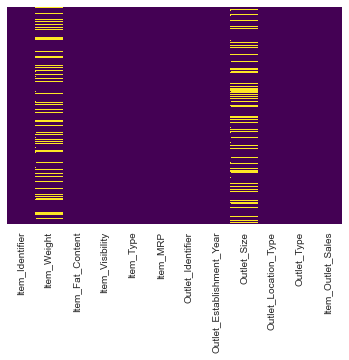

In [179]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

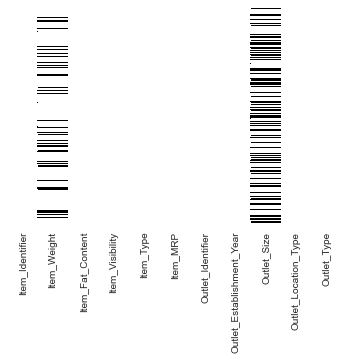

In [180]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='Greys')

### Checking unique labels from each Variable.

In [181]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [182]:
test.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

* Item Fat Content, Item Type, Outlet Identifier, Outlet Size, Outlet Location Type, Outlet Type are categorical variables, and contains few labels which can be encoded to numerical in Feature Encoding before training the model
* Outlet Establishment Year shows when outlets were established,  from 1985 to 2009.

In [183]:
# Checking Categorical Variables
categorical_var_train = []
for x in train.dtypes.index:
    if train.dtypes[x] == 'object':
        categorical_var_train.append(x)

In [184]:
categorical_var_train

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### Value count for each Categorical variable and their labels

In [185]:
for col in categorical_var_train:
    print(col)
    print(train[col].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
FDW49     9
NCF42     9
FDV60     9
         ..
FDY43     1
FDT35     1
FDQ60     1
FDO33     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

### Item_Fat_Content shows duplicate labels.

In [186]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [187]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

### Item Fat content has same categories with different names, combing them will give better outcome.

In [188]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [189]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

### Combining Item Fat Content

In [190]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [191]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### Item Fat Content impact on Sales

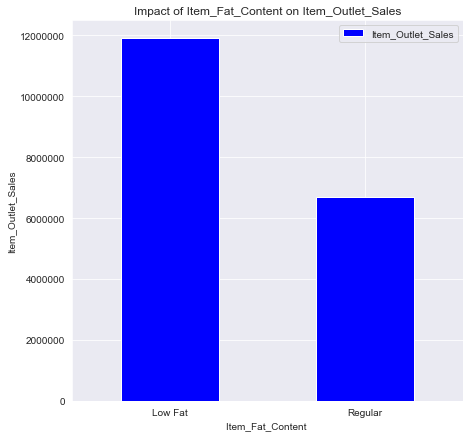

In [192]:
Item_Fat_content_pivot = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.sum)
Item_Fat_content_pivot.plot(kind='bar', color='blue',figsize=(7,7))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style="plain")
plt.show()

#### *Replacing missing values for Item_Weight, and Outlet_Size Variables.
#### *Item_Visibility also has 879 values as Zero.

## *Filling missing values for Item Weight Variable.

## Train Data

In [193]:
# Finding average weight for each item:
item_avg_weight_train = train.groupby(["Item_Identifier"])["Item_Weight"].mean()
item_avg_weight_train

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [194]:
#getting boolean values for missing values in Item_Weight
missing_bool_train = train['Item_Weight'].isnull()
missing_bool_train

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [195]:
def Impute_Item_Weight(train):
    #average weight per item
    item_avg_weight_train = train.groupby(["Item_Identifier"])["Item_Weight"].mean()
    item_avg_weight_train

In [196]:
print('Missing data in Train dataset: %d'% sum(missing_bool_train))

Missing data in Train dataset: 1463


In [197]:
# Replacing missing values from Item Weight variable with average item weight of each product using Item Identifier.

train.loc[missing_bool_train, 'Item_Weight'] = train.loc[missing_bool_train, 'Item_Identifier'].apply(lambda x: item_avg_weight_train.loc[x])
print('Final Missing values count from Item Weight Variable: %d'% sum(train['Item_Weight'].isnull()))

Final Missing values count from Item Weight Variable: 4


Item Weight has 4 more missing values

In [198]:
#Getting a boolean variable specifying missing Item_Weight values
Item_weight_missing = train['Item_Weight'].isnull() 
Item_weight_missing

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [199]:
train.loc[Item_weight_missing, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [200]:
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [201]:
train.loc[Item_weight_missing, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,12.782404,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,13.031230,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,13.379905,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,12.285317,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [202]:
train['Item_Weight'].isnull().sum()

0

In [203]:
train.shape

(8523, 12)

## Test Data

In [204]:
item_avg_weight_test = test.groupby(["Item_Identifier"])["Item_Weight"].mean()
item_avg_weight_test

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1543, dtype: float64

In [205]:
missing_bool_test = test['Item_Weight'].isnull()
missing_bool_test

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [206]:
def Impute_Item_Weight(train):
    #average weight per item
    item_avg_weight_test = test.groupby(["Item_Identifier"])["Item_Weight"].mean()
    item_avg_weight_test

In [207]:
print('Missing data in Test dataset: %d'% sum(missing_bool_test))

Missing data in Test dataset: 976


In [208]:
test.loc[missing_bool_test, 'Item_Weight'] = test.loc[missing_bool_test, 'Item_Identifier'].apply(lambda x: item_avg_weight_test.loc[x])
print('Final Missing values count from Item Weight Variable: %d'% sum(test['Item_Weight'].isnull()))

Final Missing values count from Item Weight Variable: 20


In [209]:
#Get a boolean variable specifying missing Item_Weight values
miss_after_bool_test = test['Item_Weight'].isnull() 
miss_after_bool_test.sum()

20

In [210]:
Test_Item_weight_missing = test['Item_Weight'].isnull() 
Test_Item_weight_missing

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

##### Missing values are from Tier 1 Grocery stores and Tier 3 supermarket type 3 which are medium sized outlets.

In [211]:
test.loc[Test_Item_weight_missing, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,Low Fat,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

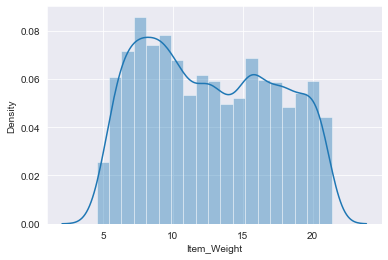

In [212]:
sns.distplot(test['Item_Weight'])

#### Filling missing values with avg weight of each item type.

In [213]:
test['Item_Weight']=test['Item_Weight'].fillna(test.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [214]:
test['Item_Weight'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

* Missing values updated with avg weight of each item type

In [215]:
test.loc[Test_Item_weight_missing, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,12.692359,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,12.692359,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,12.692359,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,13.130315,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,12.265150,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,13.130315,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,12.692359,Low Fat,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,12.692359,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,13.130315,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,12.692359,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

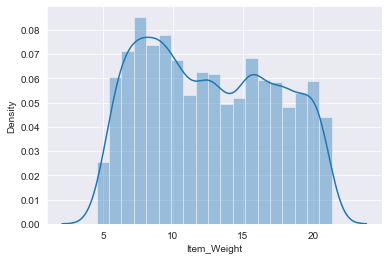

In [216]:
sns.distplot(test['Item_Weight'])

In [217]:
test['Item_Weight'].isnull().sum()

0

In [218]:
test.shape

(5681, 11)

## *Imputing missing values for Outlet Size Variable.

In [219]:
train['Outlet_Size'].isnull().sum()

2410

In [220]:
test['Outlet_Size'].isnull().sum()

1606

In [221]:
## Imputing missing values for Outlet Size variable with Mode of each Outlet Type.

train_outlet_size_mode = train.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
train_outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [222]:
train_miss_bool_outlet = train['Outlet_Size'].isnull()
train_miss_bool_outlet

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [223]:
train.loc[train_miss_bool_outlet, 'Outlet_Size'] = train.loc[train_miss_bool_outlet, 'Outlet_Type'].apply(lambda x: train_outlet_size_mode[x])

In [224]:
print('Final Missing values count from Outlet Size Variable: %d'% sum(train['Outlet_Size'].isnull()))

Final Missing values count from Outlet Size Variable: 0


Visual

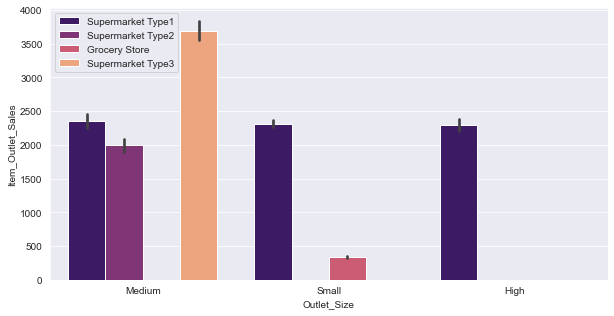

In [225]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

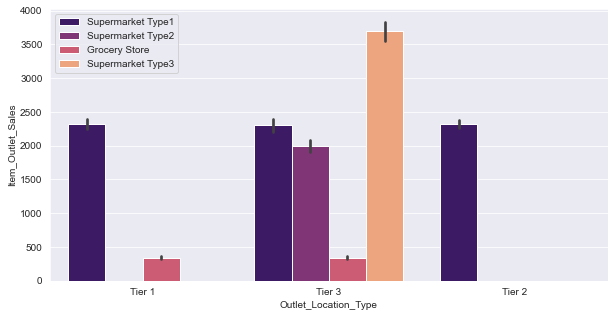

In [226]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

## Test Data

In [227]:
## Imputing missing values for Outlet Size variable with Mode size of each Outlet Type.
test_outlet_size_mode = test.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
test_outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [228]:
test_miss_bool_outlet = test['Outlet_Size'].isnull()
test_miss_bool_outlet

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [229]:
test.loc[test_miss_bool_outlet, 'Outlet_Size'] = test.loc[test_miss_bool_outlet, 'Outlet_Type'].apply(lambda x: test_outlet_size_mode[x])

In [230]:
print('Final Missing values count from Test Outlet Size Variable: %d'% sum(test['Outlet_Size'].isnull()))

Final Missing values count from Test Outlet Size Variable: 0


## *Imputing missing values for Item_Visibility Variable.

In [231]:
## Checking how many values are "0" in Item_Visibility variable.
sum(train['Item_Visibility']==0)

526

In [232]:
sum(test['Item_Visibility']==0)

353

In [233]:
# Average weight for each item:
train_item_avg_visibility = train.groupby(["Item_Identifier"])["Item_Visibility"].mean()
train_item_avg_visibility

Item_Identifier
DRA12    0.031956
DRA24    0.048062
DRA59    0.134718
DRB01    0.082126
DRB13    0.008002
           ...   
NCZ30    0.024956
NCZ41    0.051623
NCZ42    0.009044
NCZ53    0.027775
NCZ54    0.080426
Name: Item_Visibility, Length: 1559, dtype: float64

In [234]:
#getting boolean values for missing values in Item_Visibility
train_missing_bool_visibility = train['Item_Visibility']==0
train_missing_bool_visibility

0       False
1       False
2       False
3        True
4        True
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Visibility, Length: 8523, dtype: bool

In [235]:
print('Item_Visibility Missing "0": %d'% sum(train_missing_bool_visibility))

Item_Visibility Missing "0": 526


In [236]:
#Finding average visibility of each product
#Impute 0 values with avg visibility of that product:

def Train_Impute_Item_Visibility(train):
    #average visibility per item
    train_item_avg_visibility = train.groupby(["Item_Identifier"])["Item_Visibility"].mean()
    train_item_avg_visibility

In [237]:
## Replacing "0" from Item Visibility variable with average item visibility of each product.
train.loc[train_missing_bool_visibility, 'Item_Visibility'] = train.loc[train_missing_bool_visibility, 'Item_Identifier'].apply(lambda x: train_item_avg_visibility.loc[x])

In [238]:
print('Final Missing values from Item_Visibility variable: %d'% sum(train['Item_Visibility']==0))

Final Missing values from Item_Visibility variable: 0


## Test Data

In [239]:
## Checking how many values are "0" in Item_Visibility variable.
sum(test['Item_Visibility']==0)

353

In [240]:
# Average visibility for each item:
test_item_avg_visibility = test.groupby(["Item_Identifier"])["Item_Visibility"].mean()
test_item_avg_visibility

Item_Identifier
DRA12    0.040901
DRA24    0.040009
DRA59    0.128046
DRB01    0.078302
DRB13    0.005294
           ...   
NCZ30    0.032774
NCZ41    0.064351
NCZ42    0.012986
NCZ53    0.024523
NCZ54    0.083488
Name: Item_Visibility, Length: 1543, dtype: float64

In [241]:
#getting boolean values for missing values in Item_Visibility
test_missing_bool_visibility = test['Item_Visibility']==0
test_missing_bool_visibility

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679     True
5680    False
Name: Item_Visibility, Length: 5681, dtype: bool

In [242]:
print('Test Item_Visibility Missing "0": %d'% sum(test_missing_bool_visibility))

Test Item_Visibility Missing "0": 353


In [243]:
#Average visibility of each product
#Impute 0 values with mean visibility of the same product:

def Test_Impute_Item_Visibility(test):
    #average visibility per item
    test_item_avg_visibility = test.groupby(["Item_Identifier"])["Item_Visibility"].mean()
    test_item_avg_visibility

In [244]:
## Replacing "0" from Item Visibility variable with average item visibility of each product.
test.loc[test_missing_bool_visibility, 'Item_Visibility'] = test.loc[test_missing_bool_visibility, 'Item_Identifier'].apply(lambda x: test_item_avg_visibility.loc[x])

In [245]:
print('Final Missing values from Item_Visibility variable: %d'% sum(test['Item_Visibility']==0))

Final Missing values from Item_Visibility variable: 13


In [246]:
Test_Item_Visibility_missing = test['Item_Visibility']==0
Test_Item_Visibility_missing

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Visibility, Length: 5681, dtype: bool

In [247]:
test.loc[Test_Item_Visibility_missing, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
732,FDH50,15.000,Regular,0.0,Canned,185.2266,OUT049,1999,Medium,Tier 1,Supermarket Type1
1634,NCS06,7.935,Low Fat,0.0,Household,264.7910,OUT017,2007,Small,Tier 2,Supermarket Type1
2201,FDO12,15.750,Low Fat,0.0,Baking Goods,194.9452,OUT027,1985,Medium,Tier 3,Supermarket Type3
2570,FDB36,5.465,Regular,0.0,Baking Goods,129.2626,OUT049,1999,Medium,Tier 1,Supermarket Type1
3359,FDO10,13.650,Regular,0.0,Snack Foods,57.7588,OUT049,1999,Medium,Tier 1,Supermarket Type1
4367,FDK20,12.600,Regular,0.0,Fruits and Vegetables,121.9072,OUT035,2004,Small,Tier 2,Supermarket Type1
4443,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,44.1402,OUT035,2004,Small,Tier 2,Supermarket Type1
4602,FDO12,15.750,Low Fat,0.0,Baking Goods,194.8452,OUT045,2002,Small,Tier 2,Supermarket Type1
4736,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT046,1997,Small,Tier 1,Supermarket Type1
4786,NCV06,11.300,Low Fat,0.0,Household,192.8478,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [248]:
# Average weight for each item:
test_item_avg_visibility2 = test.groupby(["Item_Type"])["Item_Visibility"].mean()
test_item_avg_visibility2

Item_Type
Baking Goods             0.069322
Breads                   0.076613
Breakfast                0.081170
Canned                   0.070680
Dairy                    0.072930
Frozen Foods             0.074241
Fruits and Vegetables    0.071399
Hard Drinks              0.069609
Health and Hygiene       0.060362
Household                0.059683
Meat                     0.059854
Others                   0.056899
Seafood                  0.061042
Snack Foods              0.071156
Soft Drinks              0.069455
Starchy Foods            0.068923
Name: Item_Visibility, dtype: float64

In [249]:
# Getting boolean values for missing values in Item_Visibility
test_missing_bool_visibility2 = test['Item_Visibility']==0
test_missing_bool_visibility2

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Visibility, Length: 5681, dtype: bool

In [250]:
print('Item_Visibility Missing "0": %d'% sum(test_missing_bool_visibility))

Item_Visibility Missing "0": 353


In [251]:
def Train_Impute_Item_Visibility(test):
    #average visibility per item
    test_item_avg_visibility2 = test.groupby(["Item_Type"])["Item_Visibility"].mean()
    test_item_avg_visibility2

In [252]:
test.loc[test_missing_bool_visibility2, 'Item_Visibility'] = test.loc[test_missing_bool_visibility2, 'Item_Type'].apply(lambda x: test_item_avg_visibility2.loc[x])

In [253]:
print('Final Missing values from Item_Visibility variable: %d'% sum(test['Item_Visibility']==0))

Final Missing values from Item_Visibility variable: 0


## Creating a New Variable from Item_Identifier

## Train Data

In [254]:
#x[:2] to extract first 2 characters from Item_Identifier

train['New_Item_Type'] = train['Item_Identifier'].apply(lambda x: x[:2])
train['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [255]:
## "FD" to be replaced as Food, "NC" to Non-Consumables, and "DR" to Drinks.

train['New_Item_Type'] = train['New_Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumables', 'DR':'Drinks'})
train['New_Item_Type'].value_counts()

Food               6125
Non-Consumables    1599
Drinks              799
Name: New_Item_Type, dtype: int64

In [256]:
#Converting Outlet establishment year to how old the outlet is. Age of the outlet.
#Taking the difference between 2013 and the Year outlet was established, this dataset was collected in 2013. 

train['Outlet_Years'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [257]:
## All the missing values have been handled.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Type              8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

In [258]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875418,0.069670,140.992782,1997.831867,2181.288914,15.168133
std,4.645016,0.049810,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000
25%,8.785000,0.031114,93.826500,1987.000000,834.247400,9.000000
50%,12.650000,0.056922,143.012800,1999.000000,1794.331000,14.000000
75%,16.850000,0.097160,185.643700,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


## Test Data

In [259]:
test['New_Item_Type'] = test['Item_Identifier'].apply(lambda x: x[:2])
test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [260]:
test['New_Item_Type'] = test['New_Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumables', 'DR':'Drinks'})
test['New_Item_Type'].value_counts()

Food               4076
Non-Consumables    1087
Drinks              518
Name: New_Item_Type, dtype: int64

In [261]:
test['Outlet_Years'] = 2013 - test['Outlet_Establishment_Year']
test['Outlet_Years']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

In [262]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  New_Item_Type              5681 non-null   object 
 12  Outlet_Years               5681 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage:

In [263]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Years
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.675875,0.068865,141.023273,1997.828903,15.171097
std,4.649403,0.049449,61.809091,8.372256,8.372256
min,4.555000,0.002628,31.990000,1985.000000,4.000000
25%,8.630000,0.030617,94.412000,1987.000000,9.000000
50%,12.350000,0.056725,141.415400,1999.000000,14.000000
75%,16.700000,0.094690,186.026600,2004.000000,26.000000
max,21.350000,0.323637,266.588400,2009.000000,28.000000


## Visualising Categorical Features

# !pip install  klib

In [264]:
import klib

GridSpec(6, 8)

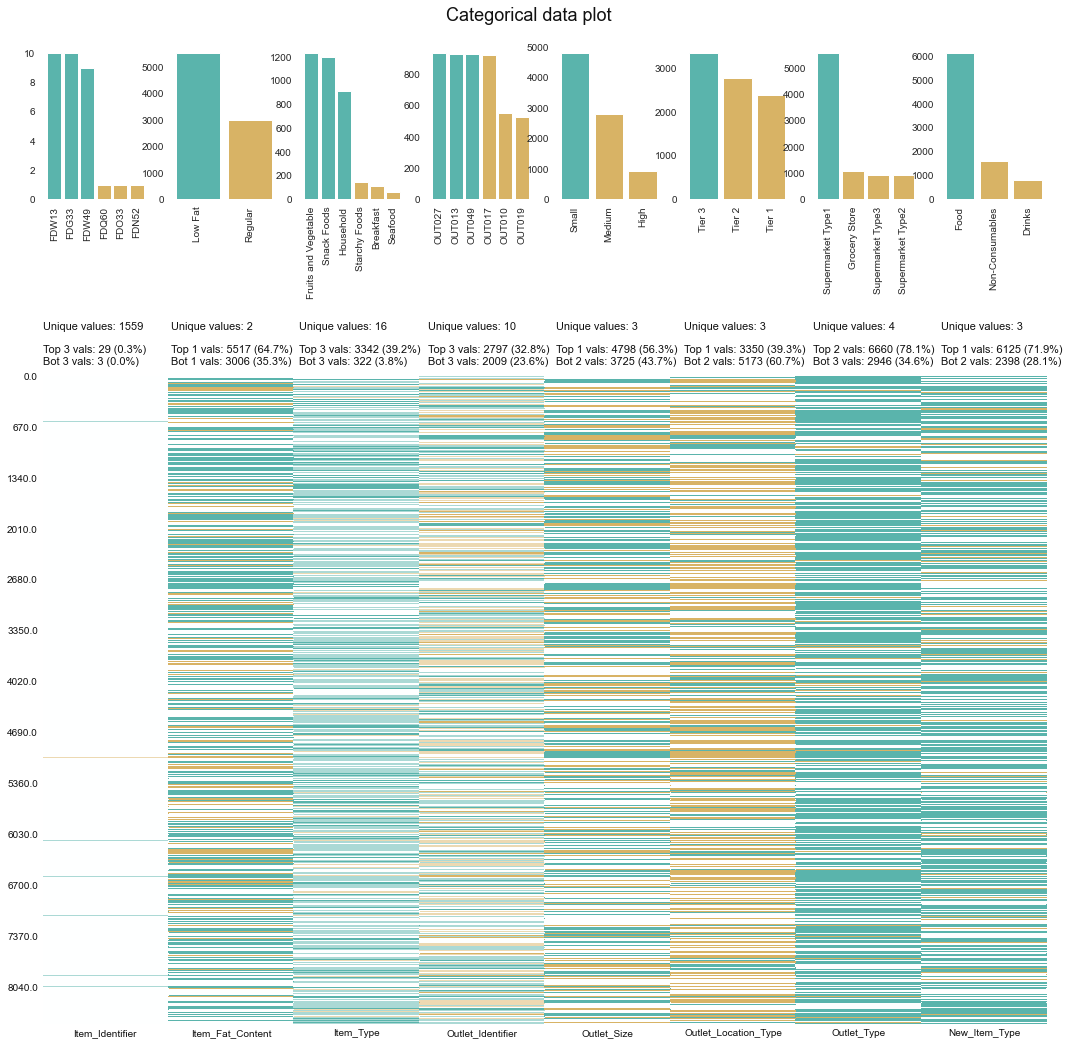

In [265]:
klib.cat_plot(train)

In [266]:
klib.corr_mat(train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.00,-0.02,0.03,-0.01,0.01,0.01
Item_Visibility,-0.02,1.00,-0.00,-0.08,-0.13,0.08
Item_MRP,0.03,-0.00,1.00,0.01,0.57,-0.01
Outlet_Establishment_Year,-0.01,-0.08,0.01,1.00,-0.05,-1.00
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00,0.05
Outlet_Years,0.01,0.08,-0.01,-1.00,0.05,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

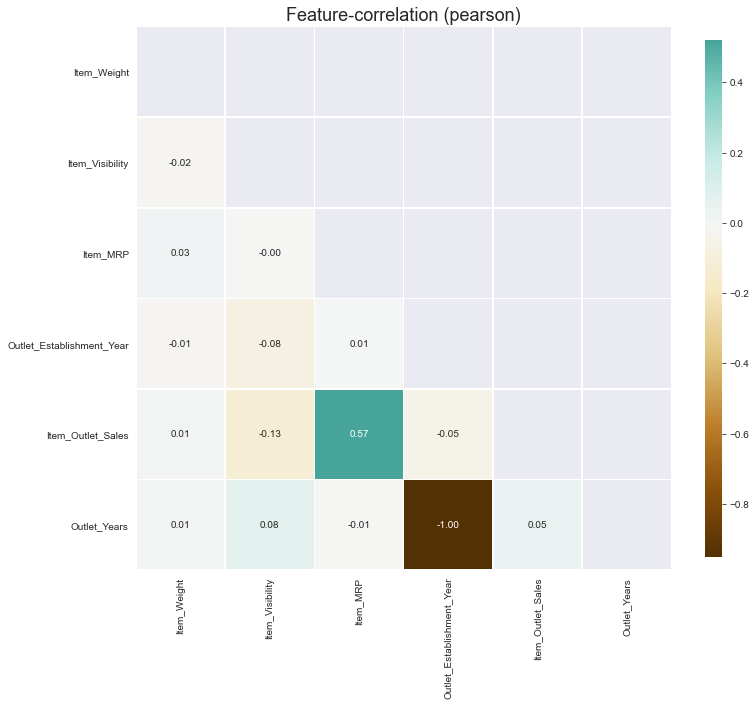

In [267]:
klib.corr_plot(train)

<AxesSubplot:>

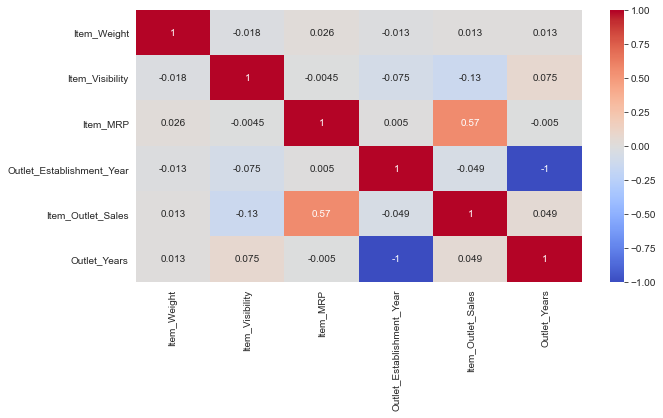

In [268]:
corr_data = train.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr_data,annot = True, cmap='coolwarm')

## Train Data - 

## Checking Numerical Variables Distribution

<AxesSubplot:xlabel='Outlet_Years', ylabel='Density'>

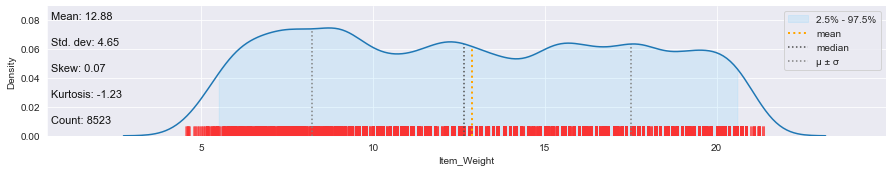

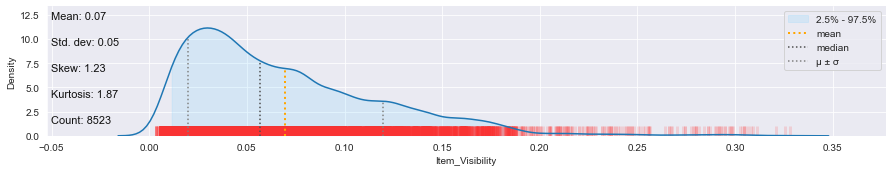

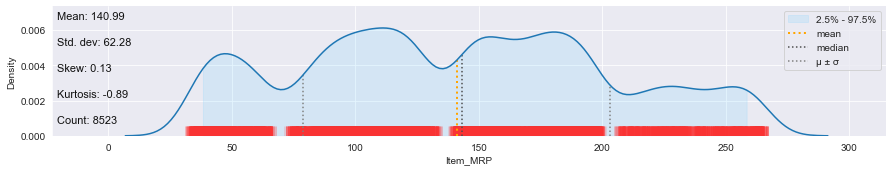

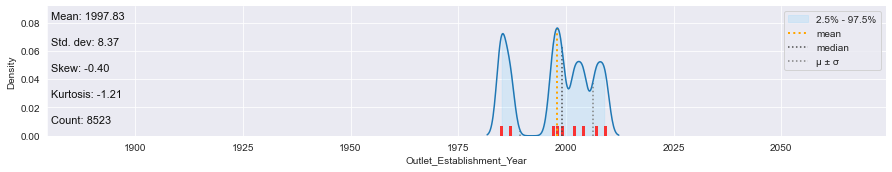

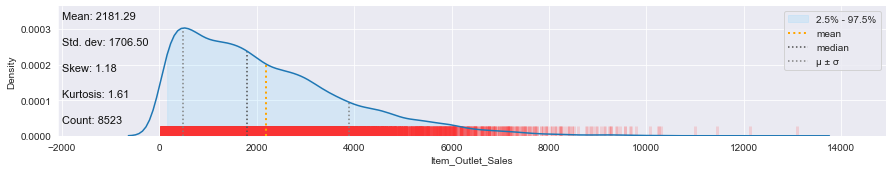

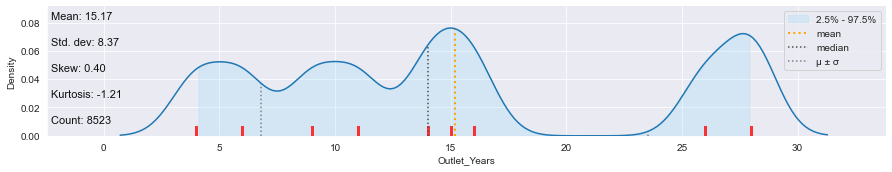

In [269]:
klib.dist_plot(train)

In [270]:
klib.data_cleaning(train)

Shape of cleaned data: (8523, 14)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.63 MB (-69.23%)



,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939,Food,14
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791,Drinks,4
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020,Food,14
3,FDX07,19.200001,Regular,0.015274,Fruits and Vegetables,182.095001,OUT010,1998,Small,Tier 3,Grocery Store,732.380005,Food,15
4,NCD19,8.930000,Low Fat,0.008082,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,Non-Consumables,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.521805,OUT013,1987,High,Tier 3,Supermarket Type1,2778.383301,Food,26
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.156998,OUT045,2002,Small,Tier 2,Supermarket Type1,549.284973,Food,11
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.113647,Non-Consumables,9
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.133202,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.597656,Food,4


In [271]:
klib.data_cleaning(test)

Shape of cleaned data: (5681, 13)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.4 MB (-71.43%)



,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,new_item_type,outlet_years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.862198,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
1,FDW14,8.300,Regular,0.038428,Dairy,87.319801,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.753799,OUT010,1998,Small,Tier 3,Grocery Store,Non-Consumables,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.033997,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
4,FDY38,13.600,Regular,0.118599,Dairy,234.229996,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.315399,OUT046,1997,Small,Tier 1,Supermarket Type1,Food,16
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.144806,OUT018,2009,Medium,Tier 3,Supermarket Type2,Food,4
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.744003,OUT045,2002,Small,Tier 2,Supermarket Type1,Non-Consumables,11
5679,FDJ26,15.300,Regular,0.091977,Canned,214.621796,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6


In [272]:
train= klib.clean_column_names(train)
train

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumables,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumables,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


In [273]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8523 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                8523 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
 12  new_item_type              8523 non-null   object 
 13  outlet_years               8523 non-null   int64

In [274]:
test= klib.clean_column_names(test)
test

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,new_item_type,outlet_years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,Non-Consumables,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,Food,16
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,Food,4
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,Non-Consumables,11
5679,FDJ26,15.300,Regular,0.091977,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6


In [275]:
train = klib.convert_datatypes(train)

In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_identifier            8523 non-null   string  
 1   item_weight                8523 non-null   float32 
 2   item_fat_content           8523 non-null   category
 3   item_visibility            8523 non-null   float32 
 4   item_type                  8523 non-null   category
 5   item_mrp                   8523 non-null   float32 
 6   outlet_identifier          8523 non-null   category
 7   outlet_establishment_year  8523 non-null   int16   
 8   outlet_size                8523 non-null   category
 9   outlet_location_type       8523 non-null   category
 10  outlet_type                8523 non-null   category
 11  item_outlet_sales          8523 non-null   float32 
 12  new_item_type              8523 non-null   category
 13  outlet_years               8523 n

In [277]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            5681 non-null   object 
 1   item_weight                5681 non-null   float64
 2   item_fat_content           5681 non-null   object 
 3   item_visibility            5681 non-null   float64
 4   item_type                  5681 non-null   object 
 5   item_mrp                   5681 non-null   float64
 6   outlet_identifier          5681 non-null   object 
 7   outlet_establishment_year  5681 non-null   int64  
 8   outlet_size                5681 non-null   object 
 9   outlet_location_type       5681 non-null   object 
 10  outlet_type                5681 non-null   object 
 11  new_item_type              5681 non-null   object 
 12  outlet_years               5681 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage:

In [278]:
test = klib.convert_datatypes(test)

In [279]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_identifier            5681 non-null   string  
 1   item_weight                5681 non-null   float32 
 2   item_fat_content           5681 non-null   category
 3   item_visibility            5681 non-null   float32 
 4   item_type                  5681 non-null   category
 5   item_mrp                   5681 non-null   float32 
 6   outlet_identifier          5681 non-null   category
 7   outlet_establishment_year  5681 non-null   int16   
 8   outlet_size                5681 non-null   category
 9   outlet_location_type       5681 non-null   category
 10  outlet_type                5681 non-null   category
 11  new_item_type              5681 non-null   category
 12  outlet_years               5681 non-null   int8    
dtypes: category(7), float32(3), int16

In [280]:
train.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales', 'new_item_type', 'outlet_years'],
      dtype='object')

In [281]:
test.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'new_item_type', 'outlet_years'],
      dtype='object')

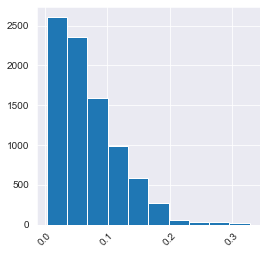

In [282]:
train['item_visibility'].hist(figsize=(4,4), xrot=45)
plt.show()

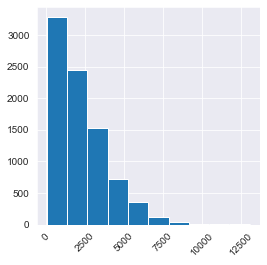

In [283]:
train['item_outlet_sales'].hist(figsize=(4,4), xrot=45)
plt.show()

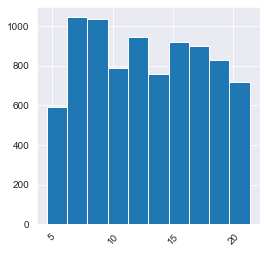

In [284]:
train['item_weight'].hist(figsize=(4,4), xrot=45)
plt.show()

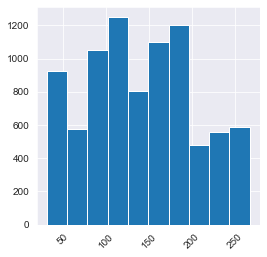

In [285]:
train['item_mrp'].hist(figsize=(4,4), xrot=45)
plt.show()

<AxesSubplot:xlabel='item_visibility', ylabel='Density'>

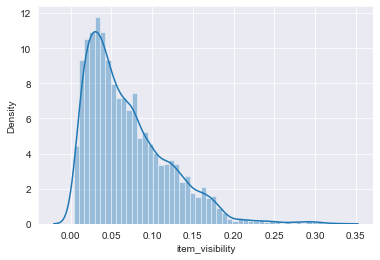

In [286]:
sns.distplot(train['item_visibility'])

<AxesSubplot:xlabel='item_outlet_sales', ylabel='Density'>

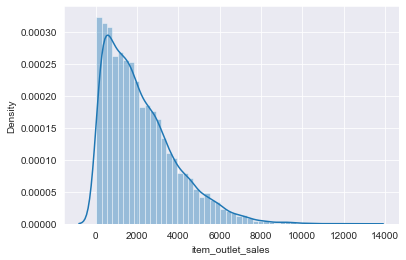

In [287]:
sns.distplot(train['item_outlet_sales'])

- Item Visibility and Item Outlet Sales have outliers.

### Transforming train data using square root transformer to fit normal distribution and handle Outliers.

- Converting skewed data to normal distribution

## Train Data

In [288]:
train['item_outlet_sales'] = np.log(train['item_outlet_sales'])
train['item_visibility'] = np.log1p(train['item_visibility'])

<AxesSubplot:xlabel='item_visibility', ylabel='Density'>

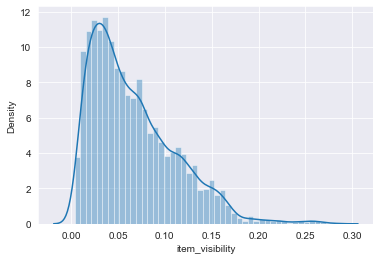

In [289]:
sns.distplot(train['item_visibility'])

<AxesSubplot:xlabel='item_outlet_sales', ylabel='Density'>

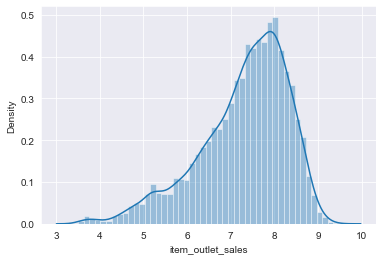

In [290]:
sns.distplot(train['item_outlet_sales'])

In [291]:
train.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales,outlet_years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875720,0.066303,140.992767,1997.831867,7.296543,15.168133
std,4.645021,0.045402,62.275051,8.371760,1.017107,8.371760
min,4.555000,0.003568,31.290001,1985.000000,3.505257,4.000000
25%,8.785000,0.030640,93.826500,1987.000000,6.726530,9.000000
50%,12.650000,0.055361,143.012802,1999.000000,7.492388,14.000000
75%,16.850000,0.092725,185.643700,2004.000000,8.039576,26.000000
max,21.350000,0.283968,266.888397,2009.000000,9.479372,28.000000


In [292]:
train.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,FDA15,9.300000,Low Fat,0.015920,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225540,Food,14
1,DRC01,5.920000,Regular,0.019095,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.094524,Drinks,4
2,FDN15,17.500000,Low Fat,0.016621,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648392,Food,14
3,FDX07,19.200001,Regular,0.015158,Fruits and Vegetables,182.095001,OUT010,1998,Small,Tier 3,Grocery Store,6.596300,Food,15
4,NCD19,8.930000,Low Fat,0.008050,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,6.902446,Non-Consumables,26


In [293]:
train.tail()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
8518,FDF22,6.865,Low Fat,0.055230,Snack Foods,214.521805,OUT013,1987,High,Tier 3,Supermarket Type1,7.929625,Food,26
8519,FDS36,8.380,Regular,0.045912,Baking Goods,108.156998,OUT045,2002,Small,Tier 2,Supermarket Type1,6.308618,Food,11
8520,NCJ29,10.600,Low Fat,0.034581,Health and Hygiene,85.122398,OUT035,2004,Small,Tier 2,Supermarket Type1,7.084321,Non-Consumables,9
8521,FDN46,7.210,Regular,0.135597,Snack Foods,103.133202,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.520558,Food,4
8522,DRG01,14.800,Low Fat,0.043900,Soft Drinks,75.467003,OUT046,1997,Small,Tier 1,Supermarket Type1,6.640751,Drinks,16


## Test Data

In [294]:
test['item_visibility'] = np.log1p(train['item_visibility'])

<AxesSubplot:xlabel='item_visibility', ylabel='Density'>

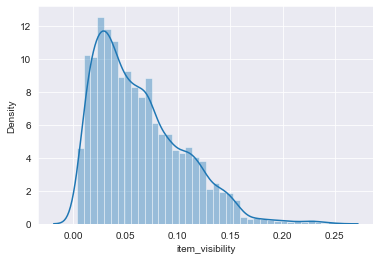

In [295]:
sns.distplot(test['item_visibility'])

In [296]:
test.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,outlet_years
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.676051,0.063147,141.023682,1997.828903,15.171097
std,4.649401,0.041500,61.809086,8.372256,8.372256
min,4.555000,0.003576,31.990000,1985.000000,4.000000
25%,8.630000,0.030028,94.412003,1987.000000,9.000000
50%,12.350000,0.054539,141.415405,1999.000000,14.000000
75%,16.700001,0.088573,186.026596,2004.000000,26.000000
max,21.350000,0.249956,266.588409,2009.000000,28.000000


In [297]:
test.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,new_item_type,outlet_years
0,FDW58,20.750,Low Fat,0.015795,Snack Foods,107.862198,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
1,FDW14,8.300,Regular,0.018915,Dairy,87.319801,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
2,NCN55,14.600,Low Fat,0.016485,Others,241.753799,OUT010,1998,Small,Tier 3,Grocery Store,Non-Consumables,15
3,FDQ58,7.315,Low Fat,0.015044,Snack Foods,155.033997,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
4,FDY38,13.600,Regular,0.008017,Dairy,234.229996,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,28


<AxesSubplot:>

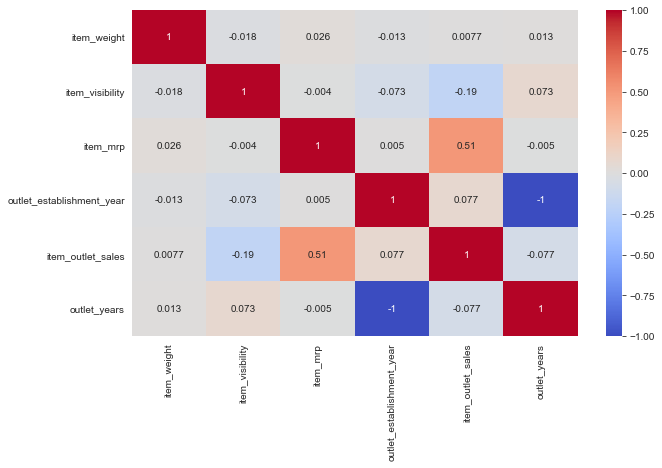

In [298]:
corr_data = train.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_data,annot = True, cmap='coolwarm')

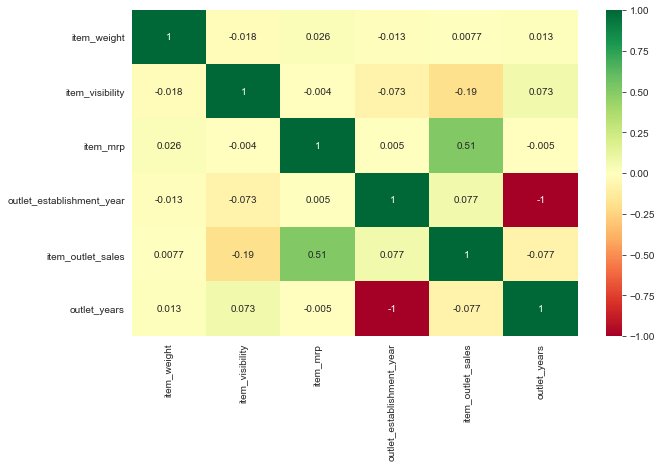

In [299]:
#Correlation Visualization
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,6))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [300]:
train.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales', 'new_item_type', 'outlet_years'],
      dtype='object')

In [301]:
train.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,FDA15,9.300000,Low Fat,0.015920,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225540,Food,14
1,DRC01,5.920000,Regular,0.019095,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.094524,Drinks,4
2,FDN15,17.500000,Low Fat,0.016621,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648392,Food,14
3,FDX07,19.200001,Regular,0.015158,Fruits and Vegetables,182.095001,OUT010,1998,Small,Tier 3,Grocery Store,6.596300,Food,15
4,NCD19,8.930000,Low Fat,0.008050,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,6.902446,Non-Consumables,26


In [302]:
train_data = train.copy()
train_data

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,FDA15,9.300000,Low Fat,0.015920,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225540,Food,14
1,DRC01,5.920000,Regular,0.019095,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.094524,Drinks,4
2,FDN15,17.500000,Low Fat,0.016621,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648392,Food,14
3,FDX07,19.200001,Regular,0.015158,Fruits and Vegetables,182.095001,OUT010,1998,Small,Tier 3,Grocery Store,6.596300,Food,15
4,NCD19,8.930000,Low Fat,0.008050,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,6.902446,Non-Consumables,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.055230,Snack Foods,214.521805,OUT013,1987,High,Tier 3,Supermarket Type1,7.929625,Food,26
8519,FDS36,8.380000,Regular,0.045912,Baking Goods,108.156998,OUT045,2002,Small,Tier 2,Supermarket Type1,6.308618,Food,11
8520,NCJ29,10.600000,Low Fat,0.034581,Health and Hygiene,85.122398,OUT035,2004,Small,Tier 2,Supermarket Type1,7.084321,Non-Consumables,9
8521,FDN46,7.210000,Regular,0.135597,Snack Foods,103.133202,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.520558,Food,4


In [303]:
train_data.drop(columns=['outlet_establishment_year','item_identifier', 'outlet_identifier'], axis = 1, inplace = True)

In [304]:
train_data.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,9.300000,Low Fat,0.015920,Dairy,249.809204,Medium,Tier 1,Supermarket Type1,8.225540,Food,14
1,5.920000,Regular,0.019095,Soft Drinks,48.269199,Medium,Tier 3,Supermarket Type2,6.094524,Drinks,4
2,17.500000,Low Fat,0.016621,Meat,141.617996,Medium,Tier 1,Supermarket Type1,7.648392,Food,14
3,19.200001,Regular,0.015158,Fruits and Vegetables,182.095001,Small,Tier 3,Grocery Store,6.596300,Food,15
4,8.930000,Low Fat,0.008050,Household,53.861401,High,Tier 3,Supermarket Type1,6.902446,Non-Consumables,26


In [305]:
print(train_data.shape)

(8523, 11)


In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, mean_absolute_error

## Label Encoding

- Text has to be converted to integers, before converting categorical variables to numerical.
- Label encoding assigns a numerical value or a rank to each label in a categorical variable. 

In [307]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

- Converting Categorical variable labels to numbers.

In [308]:
categorical_var =  ['item_fat_content', 'item_type','outlet_size','outlet_location_type', 'outlet_type','new_item_type']
for i in categorical_var:
    train_data[i] = le.fit_transform(train_data[i])

In [309]:
categorical_var

['item_fat_content',
 'item_type',
 'outlet_size',
 'outlet_location_type',
 'outlet_type',
 'new_item_type']

In [310]:
train_data.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,new_item_type,outlet_years
0,9.300000,0,0.015920,4,249.809204,1,0,1,8.225540,1,14
1,5.920000,1,0.019095,14,48.269199,1,2,2,6.094524,0,4
2,17.500000,0,0.016621,10,141.617996,1,0,1,7.648392,1,14
3,19.200001,1,0.015158,6,182.095001,2,2,0,6.596300,1,15
4,8.930000,0,0.008050,9,53.861401,0,2,1,6.902446,2,26


- All the categorical variables have been labeled with numbers, this creates bias and prioritises highest number.
- To solve this, these numeric labels have to be further encoded according to their presence.

## One hot encoding

* drop_first = True, for dummy variable trap.

In [311]:
train_data=pd.get_dummies(train_data, columns=['item_fat_content','item_type','outlet_size','outlet_location_type','outlet_type','new_item_type'],drop_first=True)

print(train_data.shape)

(8523, 30)


In [312]:
train_data.head(2)

,item_weight,item_visibility,item_mrp,item_outlet_sales,outlet_years,item_fat_content_1,item_type_1,item_type_2,item_type_3,item_type_4,item_type_5,item_type_6,item_type_7,item_type_8,item_type_9,item_type_10,item_type_11,item_type_12,item_type_13,item_type_14,item_type_15,outlet_size_1,outlet_size_2,outlet_location_type_1,outlet_location_type_2,outlet_type_1,outlet_type_2,outlet_type_3,new_item_type_1,new_item_type_2
0,9.30,0.015920,249.809204,8.225540,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019095,48.269199,6.094524,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0


In [313]:
train_data.corr()

,item_weight,item_visibility,item_mrp,item_outlet_sales,outlet_years,item_fat_content_1,item_type_1,item_type_2,item_type_3,item_type_4,item_type_5,item_type_6,item_type_7,item_type_8,item_type_9,item_type_10,item_type_11,item_type_12,item_type_13,item_type_14,item_type_15,outlet_size_1,outlet_size_2,outlet_location_type_1,outlet_location_type_2,outlet_type_1,outlet_type_2,outlet_type_3,new_item_type_1,new_item_type_2
item_weight,1.000000,-0.018219,0.025967,0.007734,0.013417,-0.026797,-0.059170,-0.002356,-0.029181,0.032033,-0.006691,0.031975,-0.049035,0.009709,0.048336,-0.005140,0.033807,-0.006619,0.013580,-0.050312,0.027646,0.004996,-0.010932,-0.016018,0.010164,-0.007675,-0.000156,0.004499,-0.014581,0.056260
item_visibility,-0.018219,1.000000,-0.004046,-0.189703,0.072831,0.053955,0.002815,0.040932,0.008020,0.037715,-0.003883,0.025538,0.002992,-0.056172,-0.042985,-0.024019,-0.021116,0.016580,0.005467,-0.009225,0.007537,-0.076697,0.098904,-0.072494,0.010003,-0.142707,-0.030777,-0.052102,0.074375,-0.075981
item_mrp,0.025967,-0.004046,1.000000,0.509671,-0.005020,0.006063,-0.000112,0.001460,-0.005666,0.035551,-0.013358,0.023688,-0.010089,-0.041646,0.046815,-0.004086,-0.018595,0.001186,0.033817,-0.035808,0.014613,-0.004510,0.002734,0.001951,-0.000744,0.004885,0.003850,-0.006714,0.029315,0.004859
item_outlet_sales,0.007734,-0.189703,0.509671,1.000000,-0.077240,0.012280,0.006972,-0.015745,0.016357,-0.004049,-0.015983,0.019695,-0.002705,-0.016624,0.015312,-0.002758,-0.018793,-0.002583,0.027743,-0.019005,0.011999,0.228752,-0.255177,0.150053,-0.022979,0.286777,0.011895,0.251612,0.024400,-0.004791
outlet_years,0.013417,0.072831,-0.005020,-0.077240,1.000000,-0.003151,0.003631,0.006768,-0.010998,0.005286,-0.007690,0.005495,-0.006627,0.002961,0.001951,0.013428,0.002874,0.001013,-0.002650,-0.007486,-0.011897,0.016346,-0.300724,-0.540820,0.333895,-0.245070,-0.466336,0.538072,0.002312,0.004385
item_fat_content_1,-0.026797,0.053955,0.006063,0.012280,-0.003151,1.000000,0.032643,0.065711,0.073235,0.021236,0.085041,0.116955,-0.118461,-0.188156,-0.255203,0.118574,-0.104988,0.012594,0.059848,-0.094875,0.025945,0.004671,-0.003079,-0.003272,0.000241,0.000533,0.002129,0.000183,0.423092,-0.354722
item_type_1,-0.059170,0.002815,-0.000112,0.006972,0.003631,0.032643,1.000000,-0.019918,-0.050010,-0.051373,-0.058204,-0.071605,-0.027955,-0.044402,-0.060225,-0.039906,-0.024776,-0.015152,-0.070514,-0.040885,-0.023156,0.001104,0.002379,0.002933,0.001909,-0.006189,-0.000734,0.007693,0.108994,-0.083710
item_type_2,-0.002356,0.040932,0.001460,-0.015745,0.006768,0.065711,-0.019918,1.000000,-0.032828,-0.033723,-0.038207,-0.047004,-0.018351,-0.029147,-0.039533,-0.026195,-0.016264,-0.009946,-0.046288,-0.026838,-0.015201,-0.000104,-0.001937,-0.008741,0.003754,-0.008695,0.000077,-0.003550,0.071547,-0.054950
item_type_3,-0.029181,0.008020,-0.005666,0.016357,-0.010998,0.073235,-0.050010,-0.032828,1.000000,-0.084670,-0.095929,-0.118015,-0.046074,-0.073181,-0.099258,-0.065770,-0.040834,-0.024972,-0.116217,-0.067383,-0.038165,0.004073,0.001469,0.009366,-0.004612,0.001236,0.010418,0.001136,0.179637,-0.137965
item_type_4,0.032033,0.037715,0.035551,-0.004049,0.005286,0.021236,-0.051373,-0.033723,-0.084670,1.000000,-0.098544,-0.121232,-0.047330,-0.075176,-0.101965,-0.067563,-0.041947,-0.025653,-0.119386,-0.069220,-0.039205,-0.005060,0.000061,-0.008162,-0.004482,0.003396,-0.001746,-0.010817,0.049898,-0.141727


sns.pairplot(train_data)

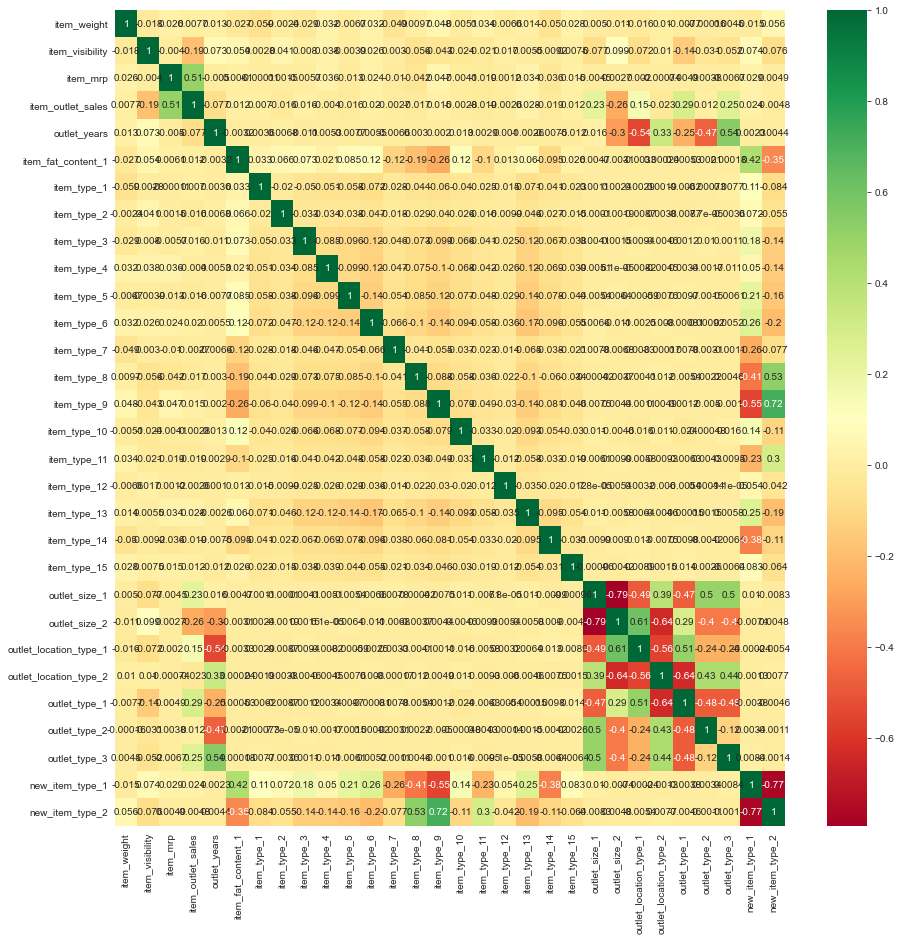

In [314]:
#Correlation Visualization
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [317]:
train.to_csv('train_data_clean.csv', index=False)

In [318]:
test.to_csv('test_data_clean.csv', index=False)

## Input Split

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X=train_data.drop('item_outlet_sales',axis=1)

In [148]:
Y=train_data['item_outlet_sales']

## Train Test Split

In [149]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, random_state=365, test_size=0.2)

In [150]:
print("X_Train shape:", X_train.shape, "X_val shape:", X_val.shape, "X_Test shape:", test.shape)

X_Train shape: (6818, 29) X_val shape: (1705, 29) X_Test shape: (5681, 13)


In [151]:
X_train.describe()

,item_weight,item_visibility,item_mrp,outlet_years,item_fat_content_1,item_type_1,item_type_2,item_type_3,item_type_4,item_type_5,item_type_6,item_type_7,item_type_8,item_type_9,item_type_10,item_type_11,item_type_12,item_type_13,item_type_14,item_type_15,outlet_size_1,outlet_size_2,outlet_location_type_1,outlet_location_type_2,outlet_type_1,outlet_type_2,outlet_type_3,new_item_type_1,new_item_type_2
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.00000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.00000,6818.000000,6818.000000
mean,12.855007,0.066417,141.286057,15.122763,0.353183,0.029481,0.01320,0.073629,0.082722,0.099883,0.147404,0.026254,0.061162,0.107803,0.047668,0.019214,0.007920,0.138604,0.050601,0.017160,0.328249,0.561455,0.329129,0.393957,0.655764,0.110590,0.10971,0.717659,0.188178
std,4.648678,0.045563,62.135216,8.387056,0.477994,0.169162,0.11414,0.261185,0.275482,0.299865,0.354534,0.159902,0.239644,0.310154,0.213078,0.137286,0.088649,0.345558,0.219198,0.129879,0.469610,0.496245,0.469931,0.488661,0.475153,0.313646,0.31255,0.450171,0.390883
min,4.555000,0.003568,31.290001,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,8.770000,0.030501,94.409401,9.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,12.600000,0.055677,143.062798,14.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
75%,16.850000,0.092619,185.391747,26.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000
max,21.350000,0.283968,266.888397,28.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Standardize the data

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
sc = StandardScaler()

Note: To prevent data leakage and avoid Bias, fit and transform on train dataset, and only transforming validation dataset, which is used for testing in this case.

In [154]:
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [155]:
X_train

array([[-1.222969  , -0.18469913, -0.16560529, ..., -0.3510399 ,
         0.62723136, -0.48145366],
       [ 0.75193125, -0.21957317, -0.26531118, ..., -0.3510399 ,
        -1.594308  ,  2.077043  ],
       [ 1.5586716 ,  0.5459855 ,  0.8481483 , ..., -0.3510399 ,
         0.62723136, -0.48145366],
       ...,
       [ 1.6985065 , -0.9344638 , -0.2754351 , ..., -0.3510399 ,
         0.62723136, -0.48145366],
       [-1.6026747 ,  0.51182   ,  0.952641  , ..., -0.3510399 ,
         0.62723136, -0.48145366],
       [ 0.69814855, -0.7162794 ,  1.8050604 , ..., -0.3510399 ,
         0.62723136, -0.48145366]], dtype=float32)

## Feature Importance

In [156]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,Y_train)

ExtraTreesRegressor()

In [157]:
print(model.feature_importances_)

[0.04101828 0.04462289 0.33303088 0.02740389 0.01137638 0.00323005
 0.00261554 0.00578637 0.00600778 0.00658692 0.00741192 0.00201935
 0.00386638 0.00420632 0.00488528 0.00210729 0.00153404 0.00831789
 0.00412045 0.00205436 0.19115977 0.16189924 0.00679104 0.00539151
 0.08450759 0.00926651 0.01120087 0.00445091 0.0031303 ]


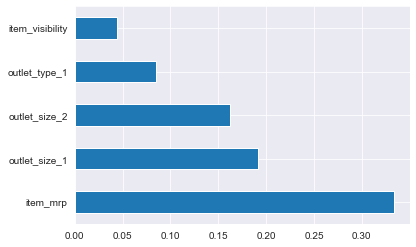

In [158]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [159]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

<AxesSubplot:title={'center':'Feature Importance'}>

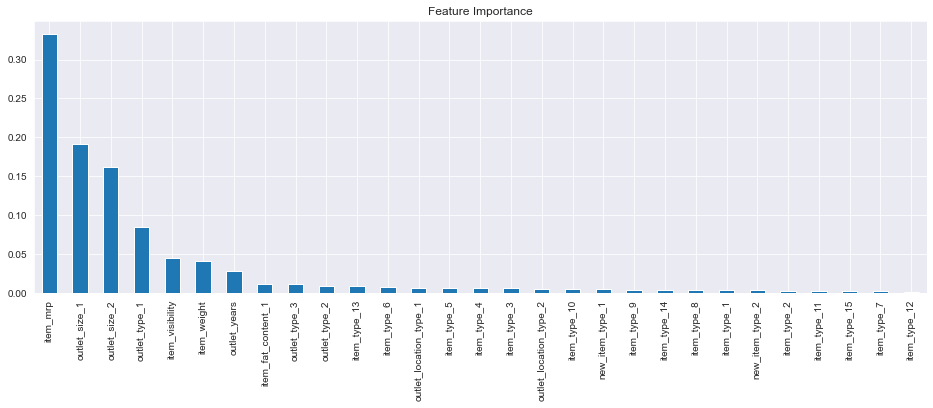

In [160]:
feat_importances = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
feat_importances.plot(kind='bar', title="Feature Importance",figsize = (16,5))

## Model Building 

### Linear Regression

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, mean_absolute_error

In [162]:
lr = LinearRegression()

In [163]:
lr.fit(X_train, Y_train)

LinearRegression()

In [164]:
y_pred_lr = lr.predict(X_val)
y_pred_lr[0:3]

array([7.238972, 7.422066, 8.074571], dtype=float32)

In [165]:
Y_val[0:3]

5698    7.196135
8253    7.971395
4025    6.457037
Name: item_outlet_sales, dtype: float32

In [166]:
print("R Squared: " , r2_score(Y_val,y_pred_lr))
print("Mean Absolute Error: ", mean_absolute_error(Y_val,y_pred_lr))
print("Mean Squared Error: ", mse(Y_val,y_pred_lr))
print("Root Mean Squared Error LR without CV: %.4g" % (np.sqrt(mse(Y_val,y_pred_lr))))

R Squared:  0.7153290907463548
Mean Absolute Error:  0.4262209
Mean Squared Error:  0.30265802
Root Mean Squared Error LR without CV: 0.5501


<AxesSubplot:title={'center':'Model Coefficients'}>

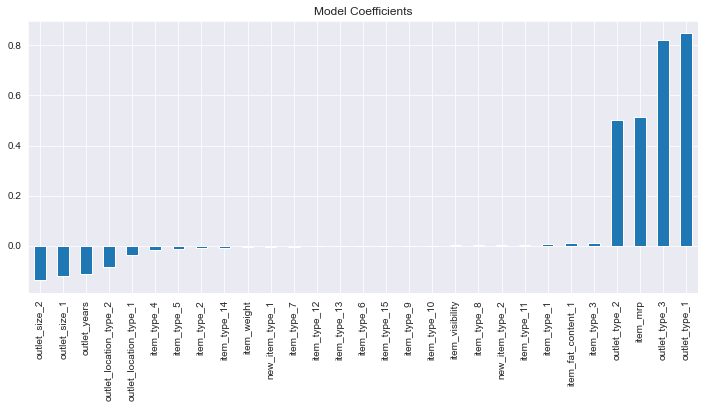

In [167]:
coef = pd.Series(lr.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients", figsize = (12,5))

## Linear Regression with Cross-Validation

In [168]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [319]:
cv_score = cross_val_score(lr,X_train,Y_train, scoring='neg_mean_squared_error', cv=10)
cv_score

array([-0.25864872, -0.26513991, -0.30114809, -0.27926806, -0.30313298,
       -0.28694212, -0.29050916, -0.31601074, -0.2793515 , -0.3057363 ])

In [320]:
avg_cv_score = np.mean(cv_score)
avg_cv_score

-0.28858875930309297

In [321]:
print("Average of 10 Cross Validation scores:", avg_cv_score)
print("RMSE of Linear Regression with Cross Validation:", np.sqrt(-1*avg_cv_score))

Average of 10 Cross Validation scores: -0.28858875930309297
RMSE of Linear Regression with Cross Validation: 0.5372045786319146


## Ridge Regression

In [322]:
from sklearn.linear_model import Ridge

In [323]:
ridge = Ridge(alpha = 0.05)

In [324]:
ridge.fit(X_train, Y_train)

Ridge(alpha=0.05)

In [325]:
y_pred_ridge = ridge.predict(X_val)
y_pred_ridge[0]

7.2389235

In [326]:
print("R Squared: " , r2_score(Y_val,y_pred_ridge))
print("Mean Absolute Error: ", mean_absolute_error(Y_val,y_pred_ridge))
print("Mean Squared Error: ", mean_squared_error(Y_val,y_pred_ridge))
print("Root Mean Squared Error of Ridge Regression without CV : %.4g" % np.sqrt(mean_squared_error(Y_val,y_pred_ridge)))

R Squared:  0.715328411209451
Mean Absolute Error:  0.4262217
Mean Squared Error:  0.30265877
Root Mean Squared Error of Ridge Regression without CV : 0.5501


In [327]:
print("Mean Absolute Error: ", np.mean(Y_val-y_pred_ridge))

Mean Absolute Error:  -0.016749097034335136


## Ridge Regression with Cross Validation

In [328]:
cv_score_ridge = cross_val_score(ridge,X_train,Y_train, scoring='neg_mean_squared_error', cv=10)
cv_score_ridge

array([-0.25865576, -0.26490569, -0.30114728, -0.27928168, -0.30311489,
       -0.28693727, -0.284973  , -0.31600934, -0.27937067, -0.30567884])

In [329]:
mean_cv_score = np.mean(cv_score_ridge)
mean_cv_score

-0.28800744116306304

In [330]:
print("Average of 10 Cross Validation scores:", mean_cv_score)
print("Root Mean Squared Error of Ridge Regression with CV:", np.sqrt(-1*mean_cv_score))

Average of 10 Cross Validation scores: -0.28800744116306304
Root Mean Squared Error of Ridge Regression with CV: 0.5366632474495184


## Lasso Regression

In [331]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.05)

In [332]:
lasso.fit(X_train,Y_train)

Lasso(alpha=0.05)

In [333]:
y_pred_lasso = lasso.predict(X_val)
y_pred_lasso[0]

7.1976895

In [334]:
print("R Squared: " , r2_score(Y_val,y_pred_lasso))
print("Mean Absolute Error: ", mean_absolute_error(Y_val,y_pred_lasso))
print("Mean Squared Error: ", mean_squared_error(Y_val,y_pred_lasso))
print("Root Mean Squared Error of Lasso Regression without CV: %.4g" % np.sqrt(mean_squared_error(Y_val,y_pred_lasso)))

R Squared:  0.6775411602704289
Mean Absolute Error:  0.4603022
Mean Squared Error:  0.34283358
Root Mean Squared Error of Lasso Regression without CV: 0.5855


## Lasso Regression with Cross Validation

In [335]:
cv_score_lasso = cross_val_score(lasso,X_train,Y_train, scoring='neg_mean_squared_error', cv=10)
cv_score_lasso

array([-0.28983834, -0.29889348, -0.32819343, -0.30118424, -0.34490943,
       -0.31238747, -0.32649598, -0.35411546, -0.32111967, -0.33446696])

In [336]:
lasso_avg_cv_score = np.mean(cv_score_lasso)
lasso_avg_cv_score

-0.32116044461727145

In [337]:
print("Average of 10 Cross Validation scores:", lasso_avg_cv_score)
print("Root Mean Squared Error of Lasso Regression with CV:", np.sqrt(-1*lasso_avg_cv_score))

Average of 10 Cross Validation scores: -0.32116044461727145
Root Mean Squared Error of Lasso Regression with CV: 0.5667101945591516


## Random Forest Regressor

In [338]:
from sklearn.ensemble import RandomForestRegressor

In [339]:
rf = RandomForestRegressor()

In [340]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [341]:
y_pred_rf = rf.predict(X_val)

In [342]:
print("R Squared: " , r2_score(Y_val,y_pred_rf))
print("Mean Absolute Error: ", mean_absolute_error(Y_val,y_pred_rf))
print("Mean Squared Error: ", mean_squared_error(Y_val,y_pred_rf))
print("Root Mean Squared Error of Lasso Regression without CV: %.4g" % np.sqrt(mean_squared_error(Y_val,y_pred_rf)))

R Squared:  0.698633831822692
Mean Absolute Error:  0.44842202153583427
Mean Squared Error:  0.3204081822379552
Root Mean Squared Error of Lasso Regression without CV: 0.566


## Hyper Parameter Tuning

In [343]:
rf_regressor = RandomForestRegressor()

In [344]:
from sklearn.model_selection import RandomizedSearchCV

In [346]:

n_estimators = [100,500,700,1000]

max_features = ['auto', 'sqrt' , 'log2']

max_depth = [10, 20, 30, 40]

min_samples_split = [5, 10, 20, 50, 100]

min_samples_leaf = [1, 3, 5, 7]

In [347]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 500, 700, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40], 'min_samples_split': [5, 10, 20, 50, 100], 'min_samples_leaf': [1, 3, 5, 7]}


In [349]:
rf_randomcv = RandomizedSearchCV(estimator = rf_regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=365, n_jobs = 1)

In [351]:
rf_randomcv.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   2.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   2.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [5, 10, 20, 50,
                                                              100],
                                        'n_estimators': [100, 500, 700, 1000]},
                   random_state=365, scoring='neg_mean_squared_error',
                   verbose=2)

In [353]:
predictions=rf_randomcv.predict(X_val)

In [354]:
print("R Squared: " , metrics.r2_score(Y_val,predictions))
print('MAE:', metrics.mean_absolute_error(Y_val, predictions))
print('MSE:', metrics.mean_squared_error(Y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_val, predictions)))

<IPython.core.display.Javascript object>

R Squared:  0.7150462533104267


<IPython.core.display.Javascript object>

MAE: 0.4338861186322615


<IPython.core.display.Javascript object>

MSE: 0.3029587314027363


<IPython.core.display.Javascript object>

RMSE: 0.550416870565153


In [356]:
rf_randomcv.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [358]:
rf_randomcv.best_score_

-0.2813759968267052

<AxesSubplot:xlabel='item_outlet_sales', ylabel='Density'>

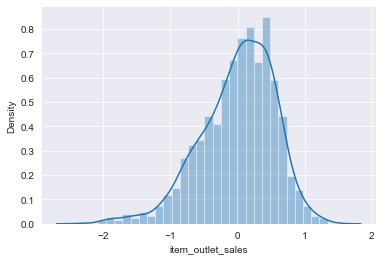

In [359]:
sns.distplot(Y_val-predictions)

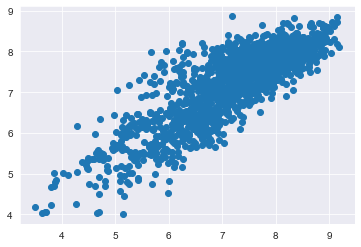

In [360]:
plt.scatter(Y_val,predictions)

In [361]:
# Fitting Random Forest Regressor with best parameters as suggested after Hyperparameter tuning Random Forest Regressor.

In [362]:
rf_regressor = RandomForestRegressor(n_estimators = 700,
 min_samples_split = 10,
 min_samples_leaf = 5,
 max_features = 'auto',
 max_depth = 30)

In [363]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=700)

In [364]:
y_pred_rf_htuned = rf_regressor.predict(X_val)

In [365]:
print("R Squared: " , r2_score(Y_val,y_pred_rf_htuned))
print("Mean Absolute Error: ", mean_absolute_error(Y_val,y_pred_rf_htuned))
print("Mean Squared Error: ", mean_squared_error(Y_val,y_pred_rf_htuned))
print("Root Mean Squared Error of RandomForestRegressor without CV: %.4g" % np.sqrt(mean_squared_error(Y_val,y_pred_rf_htuned)))

R Squared:  0.7150847199517028
Mean Absolute Error:  0.4335343968885726
Mean Squared Error:  0.30291783422213187
Root Mean Squared Error of RandomForestRegressor without CV: 0.5504


In [366]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_randomcv, file)